In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import imread
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import SGD
import tensorflow as tf

In [2]:
train=pd.read_csv("C:\\Users\\Anamika Shekhar\\MNIST\\train.csv")
test=pd.read_csv("C:\\Users\\Anamika Shekhar\\MNIST\\test.csv")

In [3]:
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
Y_train_df=train['label']


In [5]:
X_train_df=train.iloc[:,1:]
X_test_df=test

(array([4132., 4684., 4177., 4351., 4072., 3795., 4137., 4401., 4063.,
        4188.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

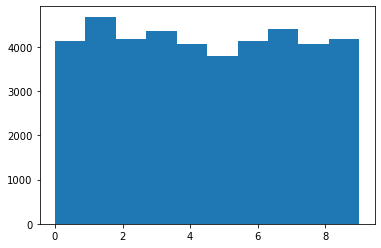

In [6]:
#To get the idea if the images are evenly distributed
plt.hist(Y_train_df)

In [7]:
#To figure of if we have a lot of null values.
X_train_df.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [8]:
X_test_df.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [9]:
X_train_df.loc[1]

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 1, Length: 784, dtype: int64

In [9]:
## Conver the dataframe to an array
X_train_ar = X_train_df.values.reshape(-1,28,28,1)
X_test_ar = X_test_df.values.reshape(-1,28,28,1)

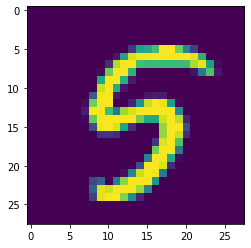

In [10]:
##View the picture
plt.imshow(X_train_ar[8])
plt.show()

In [13]:
##Grey Scale Normalization 
X_train = X_train_ar/255.0
X_test = X_test_ar/255.0

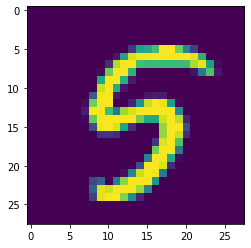

In [14]:
plt.imshow(X_train[8])
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le_X = LabelEncoder()
Y_train = le_X.fit_transform(Y_train_df)
Y_train = pd.get_dummies(Y_train, prefix='Number')
Y_train

,Number_0,Number_1,Number_2,Number_3,Number_4,Number_5,Number_6,Number_7,Number_8,Number_9
0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
41995,1,0,0,0,0,0,0,0,0,0
41996,0,1,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,1,0,0
41998,0,0,0,0,0,0,1,0,0,0


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state = 0)

In [17]:
print ("Training Examples = " + str(X_train.shape[0]))
print ("Validation Examples = " + str(X_val.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_val shape: " + str(X_val.shape))
print ("Y_val shape: " + str(Y_val.shape))
print ("X_test shape: " + str(X_test.shape))

Training Examples = 37800
Validation Examples = 4200
X_train shape: (37800, 28, 28, 1)
Y_train shape: (37800, 10)
X_val shape: (4200, 28, 28, 1)
Y_val shape: (4200, 10)
X_test shape: (28000, 28, 28, 1)


In [19]:
model = tf.keras.Sequential([
            tf.keras.layers.Conv2D(16, (5, 5), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D((2, 2)),
            tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(26, 26, 1)),
            tf.keras.layers.MaxPooling2D((2, 2)),
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_uniform'),
            tf.keras.layers.Dense(10, activation='softmax')
    
           
        
        ])

In [20]:
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=optimizer,loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, Y_val)).batch(64)
history = model.fit(train_dataset, epochs=20, validation_data=val_dataset)

Epoch 1/20
591/591 [==============================] - 23s 36ms/step - loss: 0.2601 - accuracy: 0.9183 - val_loss: 0.1018 - val_accuracy: 0.9667
Epoch 2/20
591/591 [==============================] - 21s 35ms/step - loss: 0.0920 - accuracy: 0.9705 - val_loss: 0.0646 - val_accuracy: 0.9798
Epoch 3/20
591/591 [==============================] - 21s 36ms/step - loss: 0.0688 - accuracy: 0.9783 - val_loss: 0.0633 - val_accuracy: 0.9805
Epoch 4/20
591/591 [==============================] - 21s 35ms/step - loss: 0.0569 - accuracy: 0.9823 - val_loss: 0.0489 - val_accuracy: 0.9838
Epoch 5/20
591/591 [==============================] - 21s 35ms/step - loss: 0.0484 - accuracy: 0.9850 - val_loss: 0.0432 - val_accuracy: 0.9862
Epoch 6/20
591/591 [==============================] - 21s 36ms/step - loss: 0.0439 - accuracy: 0.9862 - val_loss: 0.0411 - val_accuracy: 0.9867
Epoch 7/20
591/591 [==============================] - 21s 36ms/step - loss: 0.0378 - accuracy: 0.9880 - val_loss: 0.0362 - val_accuracy:

C:\Anamika\Python\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

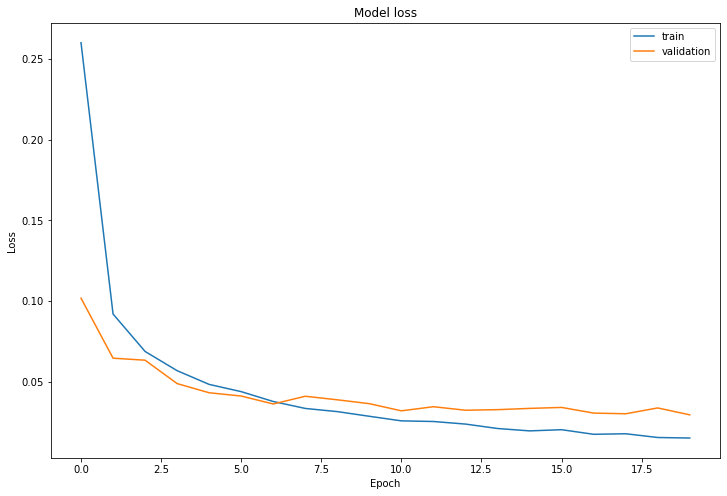

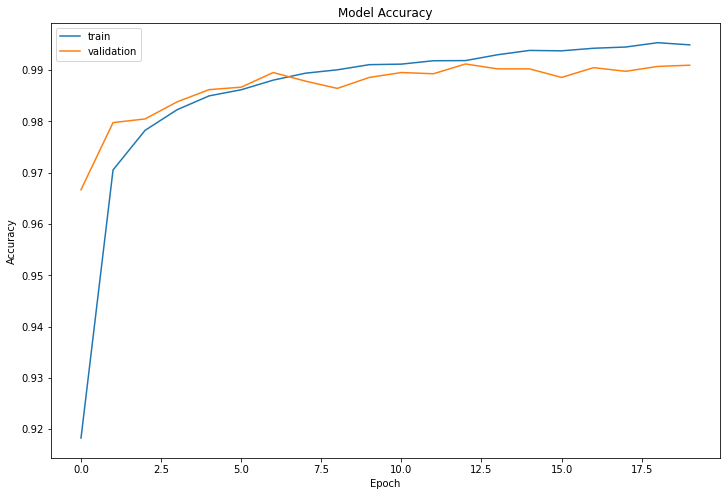

In [22]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')

In [23]:
results = model.predict(X_test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [24]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("CNN_output.csv",index=False)